# Basic Plotting with matplotlib

### The matplotlib Architecture

The whole matplotlib architecture revolves around the opeation that are neccesary for the users to:
- Create
- Render
- Update

Figure objects. 

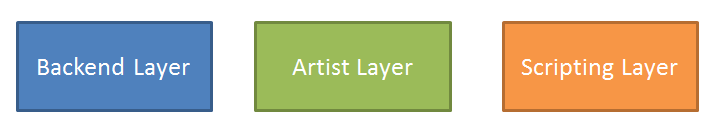

In [205]:
# Think yourself as an artist. 
from IPython.display import display, Image 
Image('first.PNG')

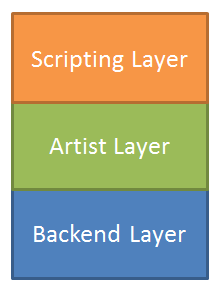

In [17]:
Image('second.PNG')

The backend layer rests at the bottom of the matplotlib architecture and it only knows about its own interface. The subsequent layers at the top of the stack know only about themselves and the layer below. 

### Steps:

- The data is either created or loaded in the scripting layer
- The data is transformed into various objects in the artist layer, it can be adjusted as scripted
- These objects are then rendered by the backend. 

## The backend layer

It's just a "backend". Don't be afraid of the name. 

The backends in matplotlib can be divided into two functional categories:
- User interface backends (interactive)
    - GTK2 and GTK 3
    - etc 
    
- Hardcopy backends (non-interactive)
    - PDF
    - SVG
    - PNG
    - etc

#### Visualizing the backend layer

What is going on behind the scenes? 

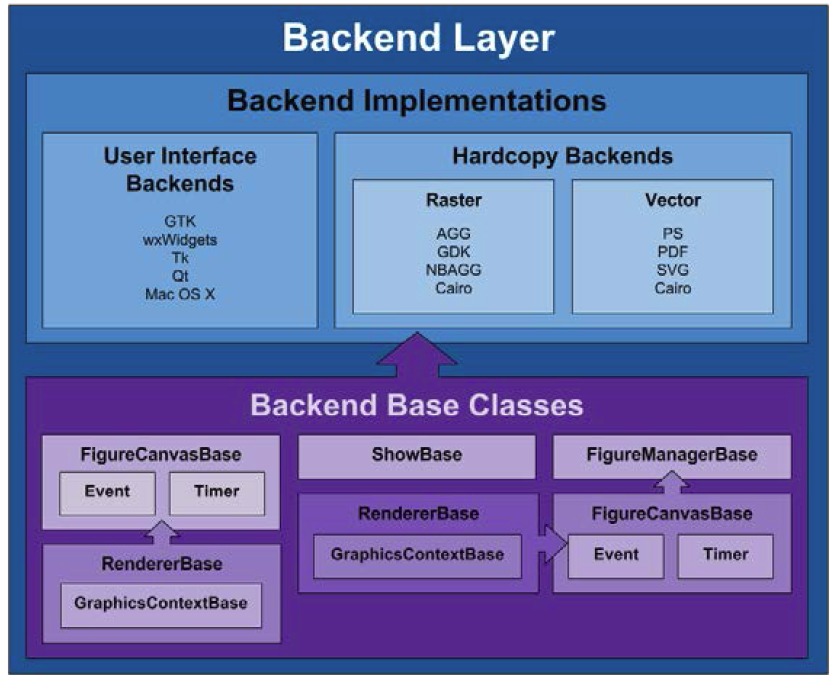

In [18]:
Image('third.PNG')

For more information, read http://matplotlib.org/api/index_backend_api.html

## The artist layer

The artist layer constitues the bulk of what matplotlib actually does i.e., the generation of the plots for the purpose of display, manipulation and publications. Most of the works done in the *artist* layer is performed by a number of classes, most of which are derived from the *Artist* base class. 

The *artist* layer is dealing with:
- lines
- shapes
- axes
- text
- etc

These are the subclasses of the *Artist* class. 

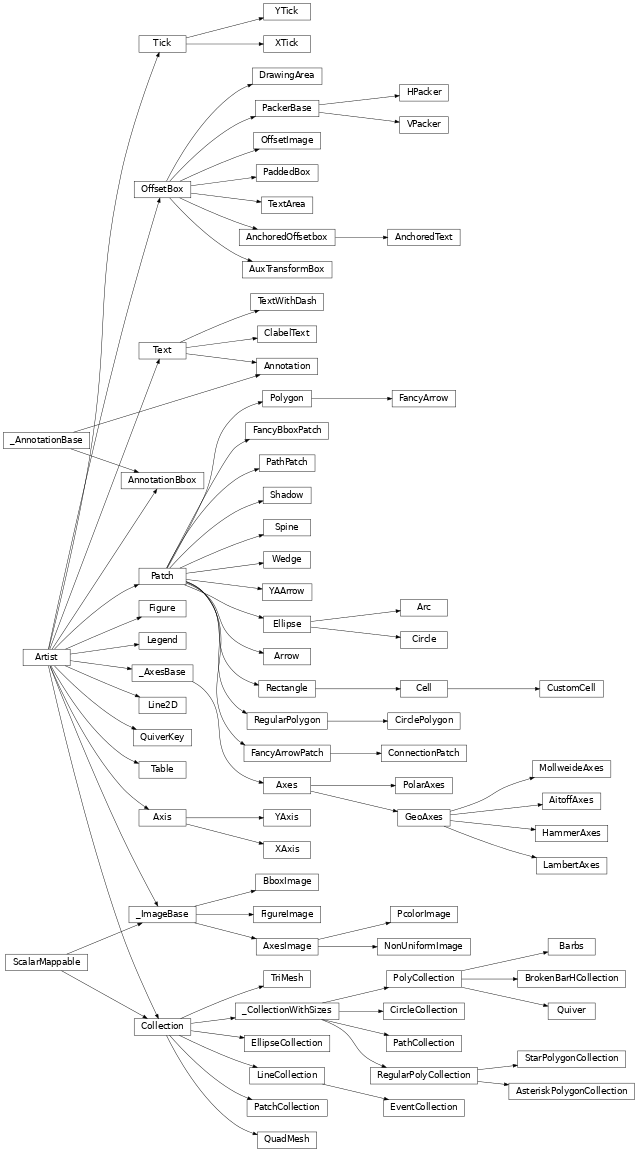

In [21]:
Image('forth.png')

credit [https://matplotlib.org/api/artist_api.html]

The *Artist* subclasses are divided into two groups:

- **Primitives**
    - *Line2D*
    - Shape (patch) classes such as *Retctangle*, *Cricle* and etc. 
    - *AxesImage* and *FigureImage*
    
    
- **Containers**
    - *Figure*
    - *XAxis* and *YAxis*
    - *Axes*, *PolarAxes*
    - *Subplot*
    
    
- **Collections** : for creating a large number similar objects
    - *PolyCollection*
    - *EllipseCollection*
    - *etc*


Read http://www.aosabook.org/en/matplotlib.html

In [206]:
# Example
import matplotlib as mpl
mpl.figure?

**Important note** : Of all the containers, the *Axes* class is one of the most important. It is used by most of the matplotlib objects (both primitives and other containers) 

#### Visualizing the artist layer

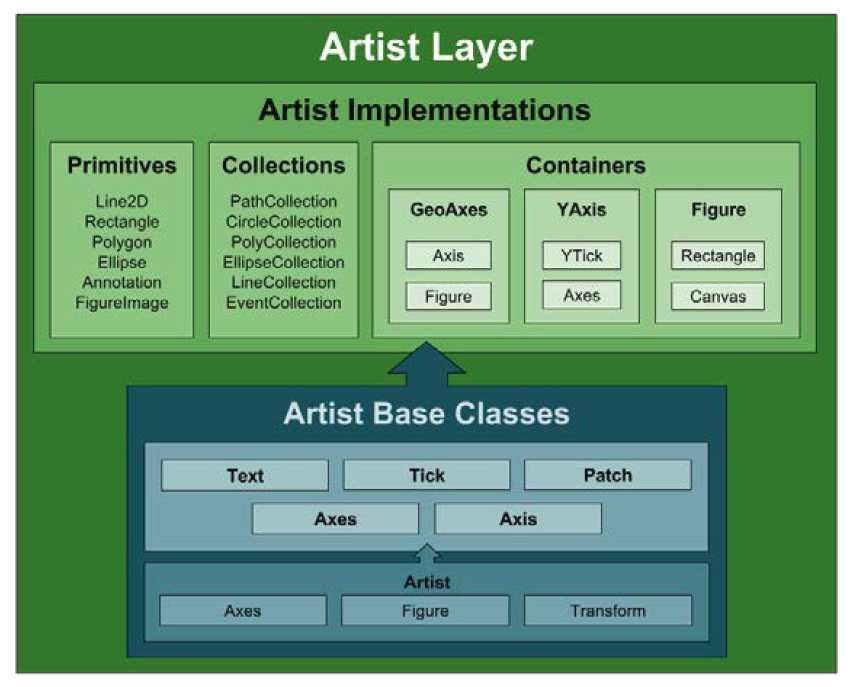

In [34]:
Image('fifth.PNG')

## The scripting layer

While the backend layer focuses on providing a common interface to the toolkits and rendering the primitives and containers of the artist layer, the scripting layer is the user-facing interface that simplifies the task of working with other layers. 

- *pyplot*
- *pylab*

The *pyplot* interface defines a series of functions as:
- *plot()* : calling the *plot* method
- *title()* : setting the title of the current figure
- *savefig()* : saving the current figure
- *gcf()* : returning the current figure
- *gca()* : returning the *Axes* instance of the current figure
- *etc*

#### Visualizing the artist layer

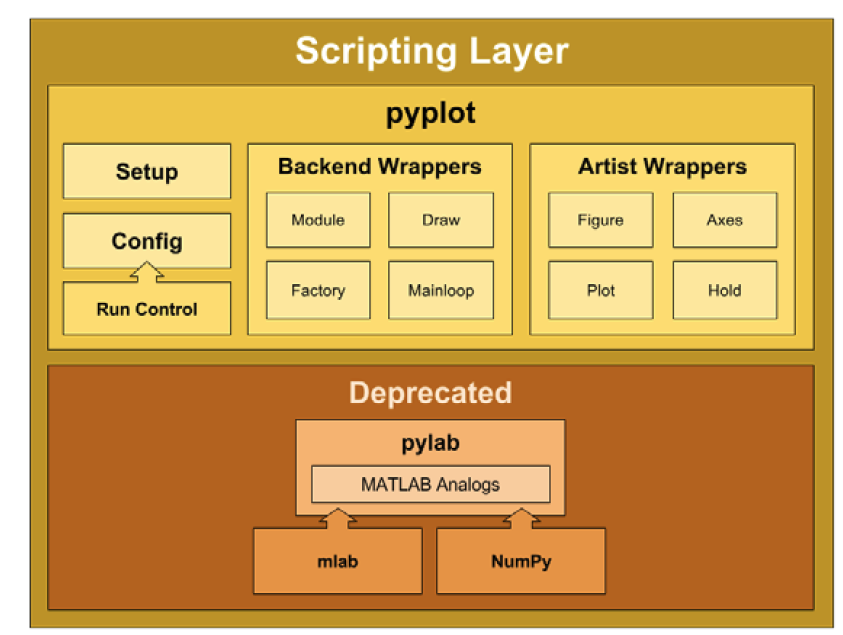

In [35]:
Image('sixth.PNG')

### General view 

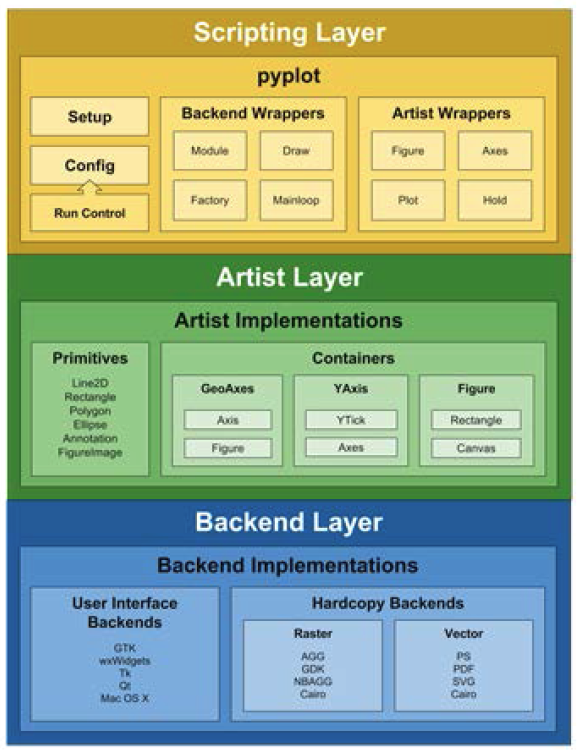

In [36]:
Image('seventh.PNG')

##### Credit: Mastering matplotlib book 

## Now let's practice

You can show matplotlib figures directly in the notebook by using `matplotlib inline` and `matplotlib notebook` magic commands. 
`matplotlib notebook` provide and interactie environment.

In [207]:
%matplotlib notebook

In [208]:
# Importing matplotlib and checking the backend renderer
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [196]:
# Accessing to the scripting layer
import matplotlib.pyplot as plt
plt.plot?

<IPython.core.display.Javascript object>


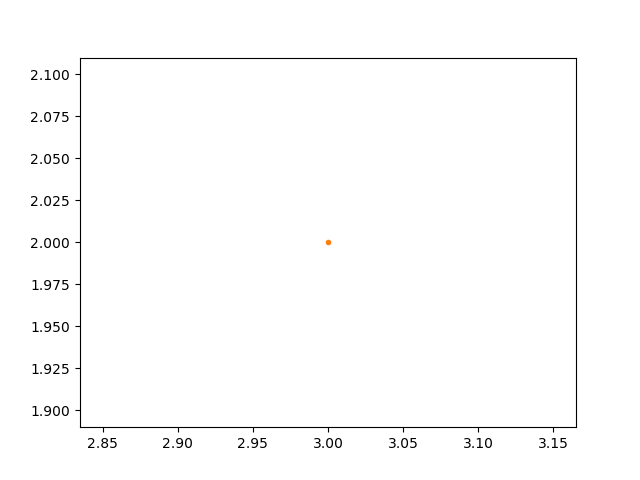

In [197]:
# test
plt.plot(3, 2)

In [198]:
# We can pass in '.' to plt.plot to indicate the style so we can see the 
# plotting
plt.plot(3, 2, '.')

Let's see how to make the same plot without using the scripting layer

In [202]:
# Not using nbAgg, but defining a a custum backend_agg
from matplotlib.backends.backend_agg import FigureCanvasAgg
# Importing Figure from the artist layer
from matplotlib.figure import Figure

# Creating a new figure
fig = Figure()

# Associating fig with the backend
canvas = FigureCanvasAgg(fig)

# Adding a subplot to the fig (from artist layer)
ax = fig.add_subplot(111) # 111 means we just want one plot

# Plotting the point (3, 2)
ax.plot(3, 2, '.')


# Nothing is shown. why?

In [203]:
# Not using nbAgg, but defining a a custum backend_agg
from matplotlib.backends.backend_agg import FigureCanvasAgg
# Importing Figure from the artist layer
from matplotlib.figure import Figure

# Creating a new figure
fig = Figure()

# Associating fig with the backend
canvas = FigureCanvasAgg(fig)

# Adding a subplot to the fig (from artist layer)
ax = fig.add_subplot(111)

# Plotting the point (3, 2)
ax.plot(3, 2, '.')

# Saving the figure to test.png
canvas.print_png('test.png')

We can use html cell magic to display the image

In [204]:
%%html
<img src='test.png' />

Not using scripting layer, make our life more complicated.

Now, let's write the same simple code using scripting layer

In [54]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


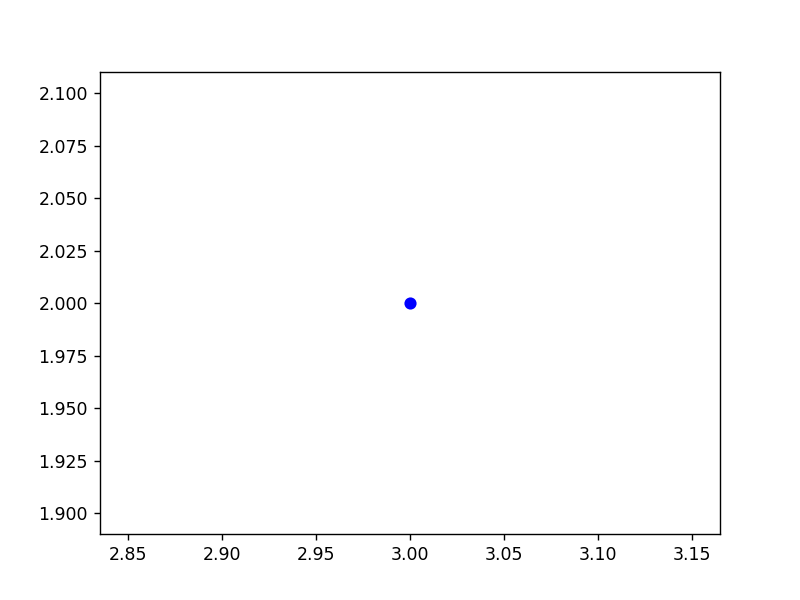

In [117]:
# Creating a new figure
plt.figure()

# Plotting the point (3, 2) using blue circle marker
plt.plot(3, 2, 'bo')


<IPython.core.display.Javascript object>


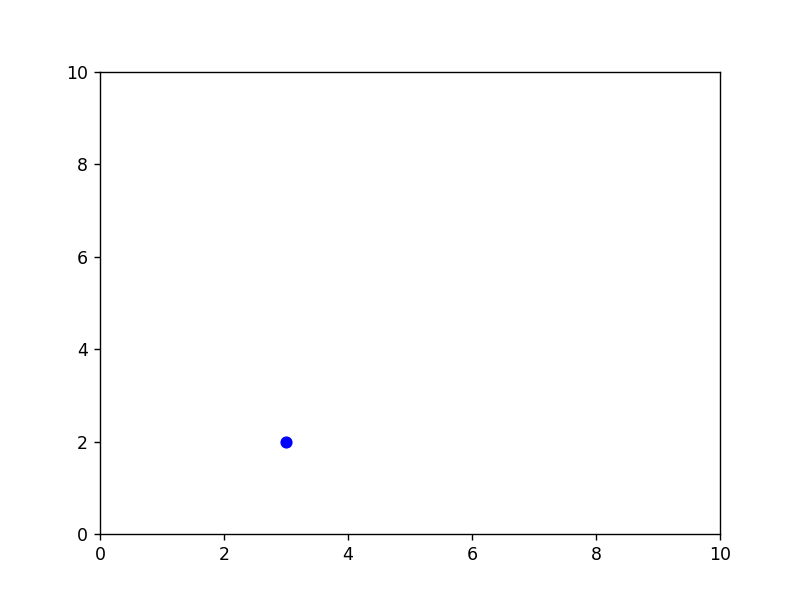

[0, 10, 0, 10]

In [65]:
# How to set axis properties


# Creating a new figure
plt.figure()

# Plotting the point (3, 2) using blue circle marker
plt.plot(3, 2, 'bo')

# Getting the current axes
ax = plt.gca()
ax.axis([0, 10, 0, 10])

You can add artist to an axes object at any time. 

<IPython.core.display.Javascript object>


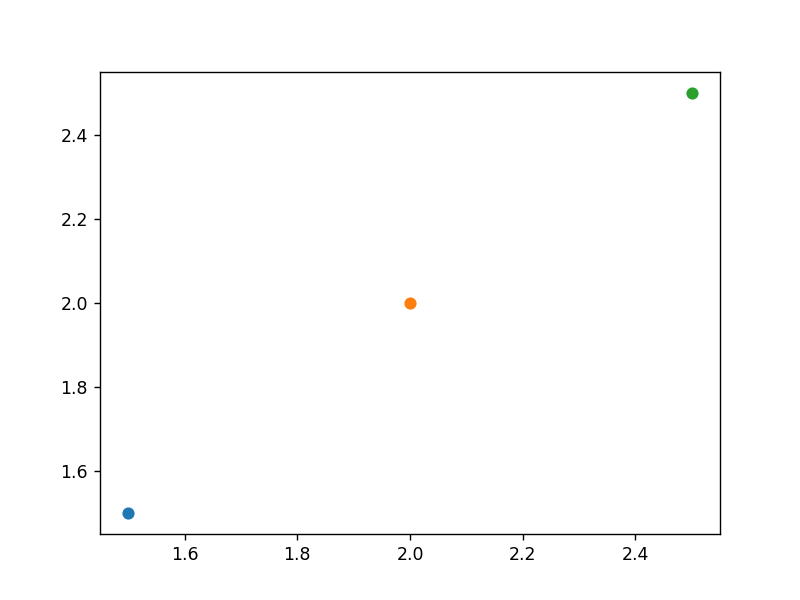

In [118]:
# create a new figure
plt.figure()

# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')

In [119]:
# Getting current axes
ax = plt.gca()

# Getting all the child objects that the axes contains
ax.get_children()

## Scatterplots

In [124]:
plt.scatter?

<IPython.core.display.Javascript object>


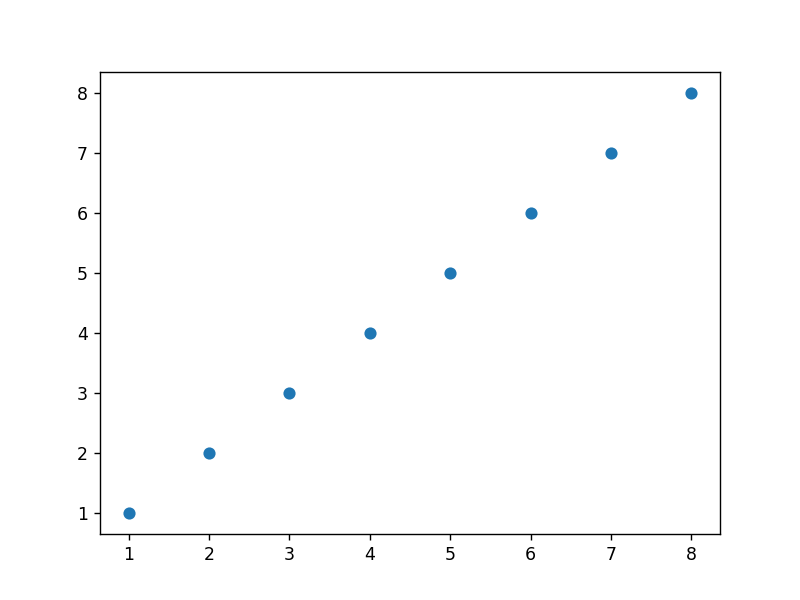

In [120]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
plt.scatter(x, y) # similar to plt.plot(x, y, '.'), but the underlying child objects in the axes are not Line2D

How to change the colors of the points?

<IPython.core.display.Javascript object>


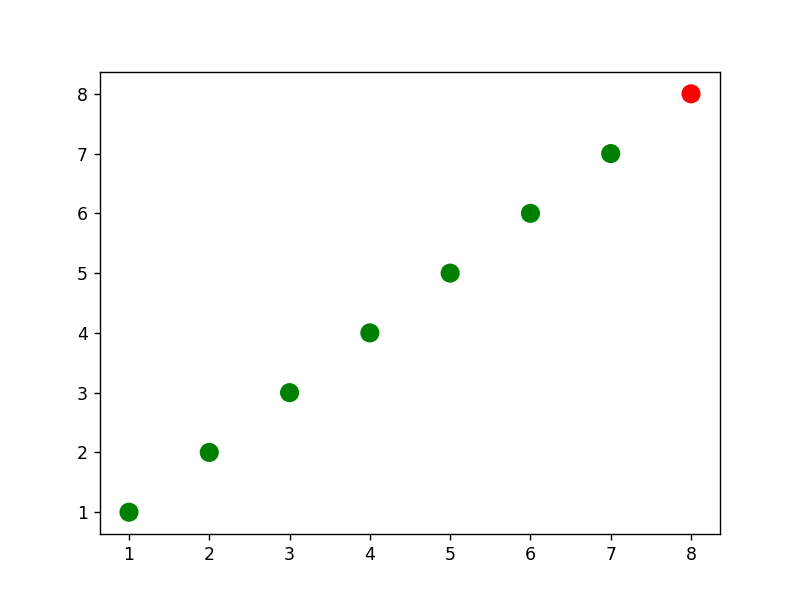

In [122]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

# create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']
colors = ['green']*(len(x)-1)
colors.append('red')

plt.figure()

# plot the point with size 100 and chosen colors
plt.scatter(x, y, s=100, c=colors)

In [130]:
# use zip to convert 5 tuples with 2 elements each to 2 tuples with 5 elements each
print(list(zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))))
# the above prints:
# [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]


zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# let's turn the data back into 2 variables x and y
x, y = zip(*zip_generator) # This is like calling zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))
print(x)
print(y)
# the above prints:
# (1, 2, 3, 4, 5)
# (6, 7, 8, 9, 10)

[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]
(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


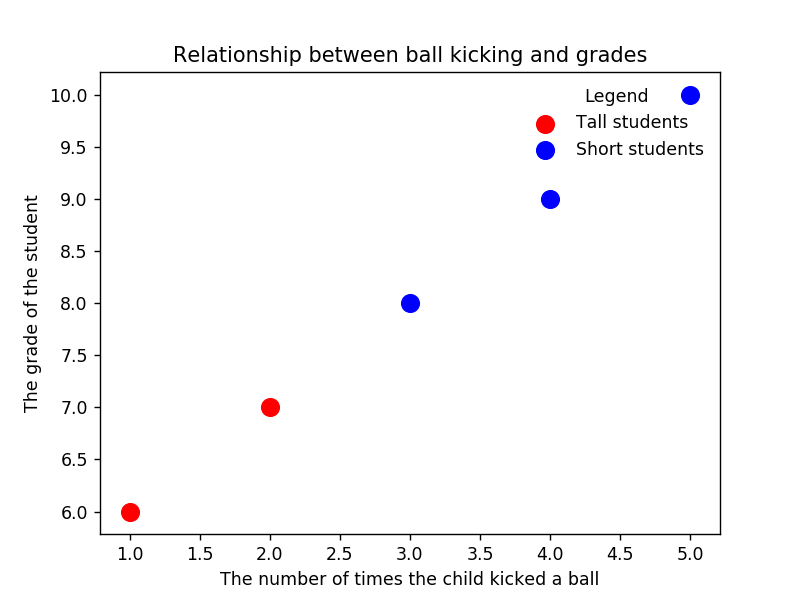

In [131]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

In [132]:
# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')
plt.legend()

In [137]:
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc=1, frameon=False, title='Legend')

In [134]:
plt.legend?

In [84]:
# get children from current axes (the legend is the second to last item in this list)
plt.gca().get_children()

In [139]:
# get the legend from the current axes
legend = plt.gca().get_children()[-2]
legend

In [140]:
# you can use get_children to navigate through the child artists
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

### Line Plots

In [141]:
plt.plot?

<IPython.core.display.Javascript object>


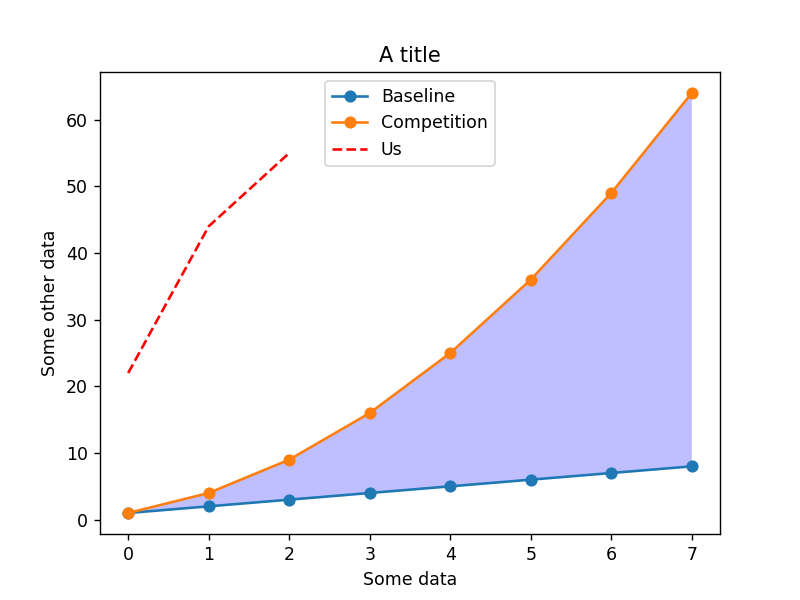

In [148]:
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

plt.figure()
# plot the linear data and the exponential data
# Just plotting y axis
plt.plot(linear_data, '-o', exponential_data, '-o')

In [149]:
# plot another series with a dashed red line
plt.plot([22,44,55], '--r')

In [150]:
# Using regular axis label and also legend
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])

In [146]:
# Filling up with colors 
plt.fill_between?

In [151]:
# fill the area between the linear data and exponential data
plt.fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25)

Let's try working with dates!

<IPython.core.display.Javascript object>


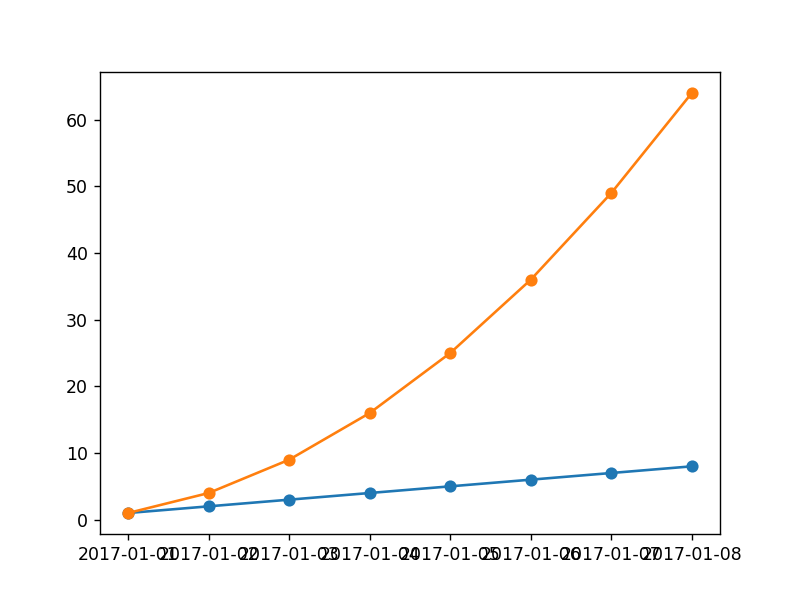

In [155]:
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

Let's try using pandas

<IPython.core.display.Javascript object>


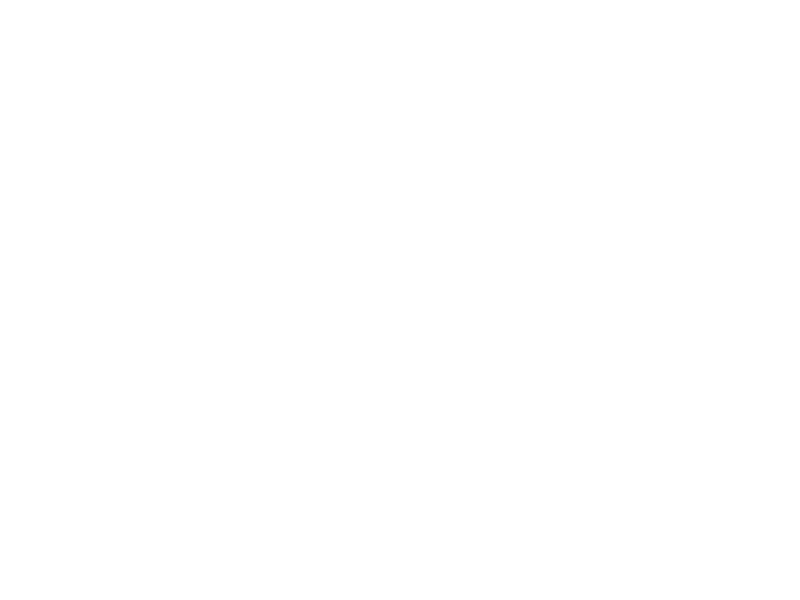

TypeError: object of type 'map' has no len()

In [154]:
import pandas as pd

plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = map(pd.to_datetime, observation_dates) # trying to plot a map will result in an error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

<IPython.core.display.Javascript object>


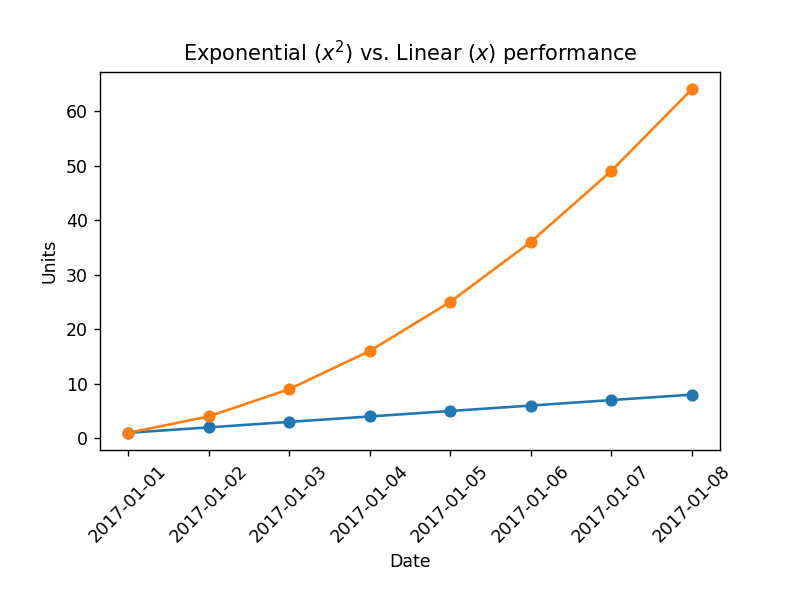

In [156]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates)) # convert the map to a list to get rid of the error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

In [ ]:
plt.gca().xaxis

In [174]:
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

In [176]:
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

In [177]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance')

In [178]:
# you can add mathematical expressions in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

### Bar Charts

<IPython.core.display.Javascript object>


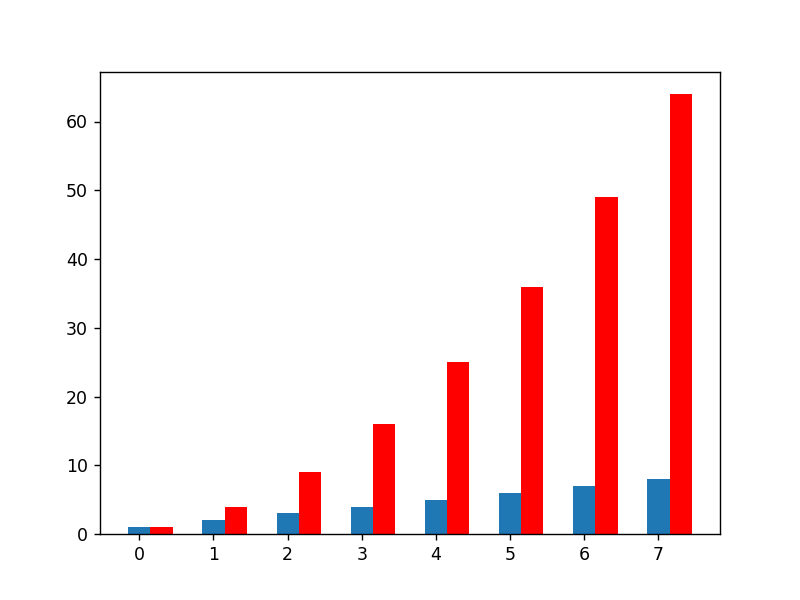

<Container object of 8 artists>

In [188]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

In [189]:
# Adding a second bar

new_xvals = []

# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)

plt.bar(new_xvals, exponential_data, width = 0.3 ,color='red')

<Container object of 8 artists>

<IPython.core.display.Javascript object>


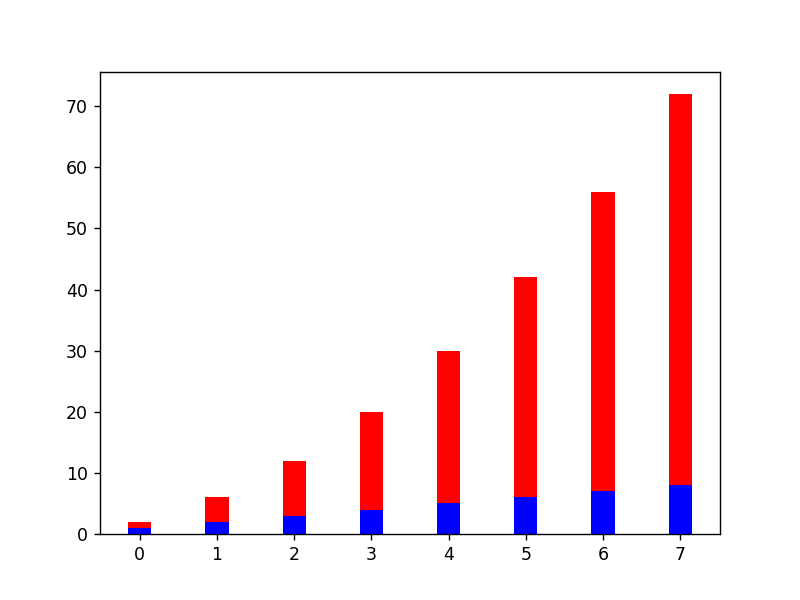

<Container object of 8 artists>

In [190]:
# stacked bar charts are also possible
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

<IPython.core.display.Javascript object>


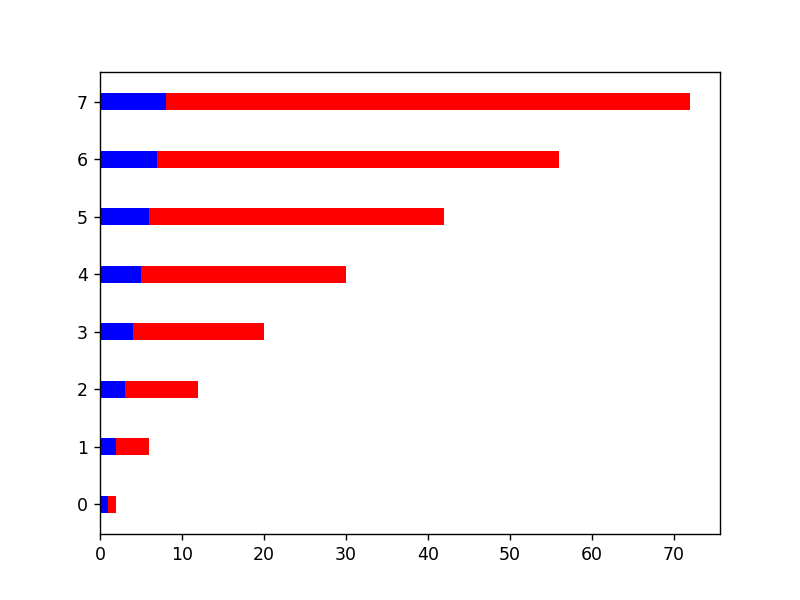

<Container object of 8 artists>

In [191]:
# or use barh for horizontal bar charts
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')